# Neural Networks II

## Introduction

- We continue our work on neural networks.
- This lecture focuses on some key components and challenges.

## Activation functions

- McCulloch - Pitts neuron and the Perceptron was motivated by neurons in the brain.
- Utilised a step function to mimic a neuron "firing".
- Not good for gradient descent $\Rightarrow$ replace with a differentiable approximation of the step function.
- The "classic" activation function is the sigmoid activation function: $$f_{\text{s}}(x) = \dfrac{1}{1+\exp(-x)}$$
- Nice derivative: $$\frac{d f_{\text{s}}(x)}{dx}=f_{\text{s}}(x)(1-f_{\text{s}}(x))$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 400)

# Step activation function
step = np.where(x >= 0, 1, 0)

# Sigmoid activation function
sigmoid = 1 / (1 + np.exp(-x))


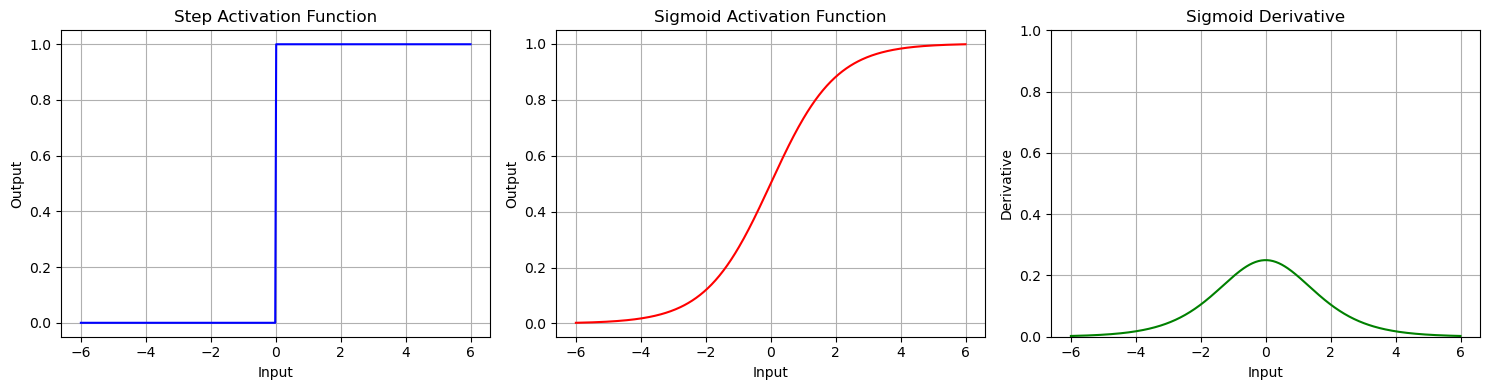

In [9]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(x, step, color='blue')
plt.title('Step Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(x, sigmoid, color='red')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(1, 3, 3)
sigmoid_derivative = sigmoid * (1 - sigmoid)
plt.plot(x, sigmoid_derivative, color='green')
plt.title('Sigmoid Derivative')
plt.xlabel('Input')
plt.ylabel('Derivative')
plt.ylim(0, 1)
plt.grid(True)

plt.tight_layout()
plt.show()

### Backpropagation for MLP with one neuron in each layer

- Consider MLP with 4 layers and 1 neuron in each layer.
- Let us do Backpropagation with this network.

<p float="left">
    <img src="media/simple_nn.png" width="800" />
</p>


### The vanishing gradient problem

- As the number of layers increase, the number of $1>$ numbers get multiplied.
- Gradients "vanish", training lower layers becomes difficult.

<p float="left">
    <img src="media/simple_nn.png" width="800" />
</p>


### What about other activation functions?

- Another classical choice: $$f_{\text{t}}(x) = \text{tanh}(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$
- Also nice derivative: $$\frac{d f_{\text{t}}(x) }{dx}=1-f_{\text{t}}(x)^2$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 400)

# Sigmoid activation function and its derivative
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_derivative = sigmoid * (1 - sigmoid)

# Tanh activation function and its derivative
tanh = np.tanh(x)
tanh_derivative = 1 - tanh**2

Text(0, 0.5, 'Output / Derivative')

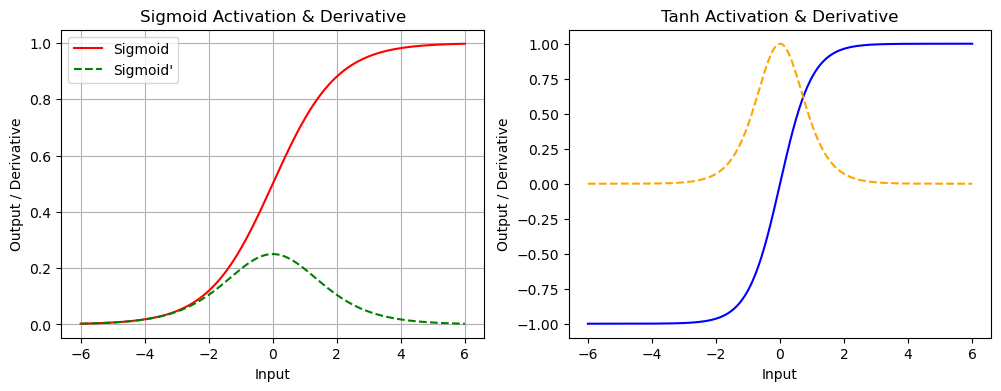

In [12]:
plt.figure(figsize=(12, 4))

# Left plot: Sigmoid and its derivative
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid, label='Sigmoid', color='red')
plt.plot(x, sigmoid_derivative, label="Sigmoid'", color='green', linestyle='--')
plt.title('Sigmoid Activation & Derivative')
plt.xlabel('Input')
plt.ylabel('Output / Derivative')
plt.legend()
plt.grid(True)

# Right plot: Tanh and its derivative
plt.subplot(1, 2, 2)
plt.plot(x, tanh, label='Tanh', color='blue')
plt.plot(x, tanh_derivative, label="Tanh'", color='orange', linestyle='--')
plt.title('Tanh Activation & Derivative')
plt.xlabel('Input')
plt.ylabel('Output / Derivative')

### What about other activation functions?

- Tanh has slightly better behavior than sigmoid, but still issues.
- Modern acitvation functions handle this problem much better (covered in FYS3033).

## Gradient descent with momentum

### Momentum

- Standard gradient descent can have slow convergence
    - Slow to train! Draw example $\Rightarrow$

### Momentum

- Idea: Incorporate information from previous iteration. Keep the "momentum".
- Reminder 
- Mathematically: $$$$

## Beyond binary classification



### The softmax function

### Derivative of the softmax function

### Cross-entropy loss

## Programming exercises

Below are programming exercises assocaited with this lecture. These cell blocks are starting points that loads the data and prepares the problem such that you can get going with the implementation. There are also theoretical exercsies, but due to copyright we cannot shared them here. They will be made available in a private repository connected to the course.


## Non-linear classification I

The code below loads a classic synthetic machine learning dataset, the Two Moons dataset. This is a binary classification problem that is not solvable with a linear classifier (try one of your classifiers from previous notebooks and see for yourself.) Design and train a MLP to solve the task. You can experiment with making the problem more or less challenging by changing the "noise" parameter in the "make_moons" function.

This is the same problem as last week, but this tome you will optimize with momentum included in the gradient descent algorithm.

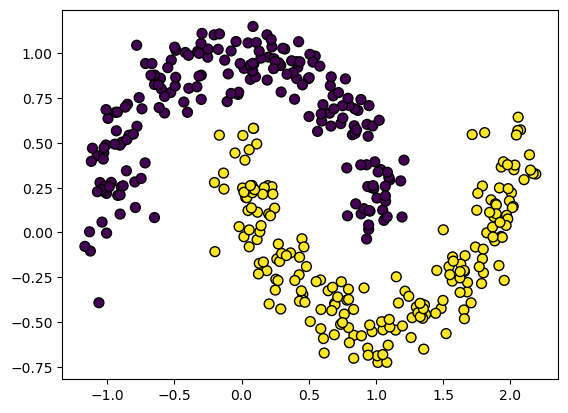

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=400, noise=0.11, random_state=42)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.show()

## Non-linear classification II

The code below loads another classic synthetic machine learning dataset, the Two Circles dataset. This is a binary classification problem that is not solvable with a linear classifier (try one of your classifiers from previous notebooks and see for yourself.) Design and train a MLP to solve the task. You can experiment with making the problem more or less challenging by changing the "noise" and "factor" parameter in the "make_circles" function.

This is the same problem as last week, but this tome you will optimize with momentum included in the gradient descent algorithm.

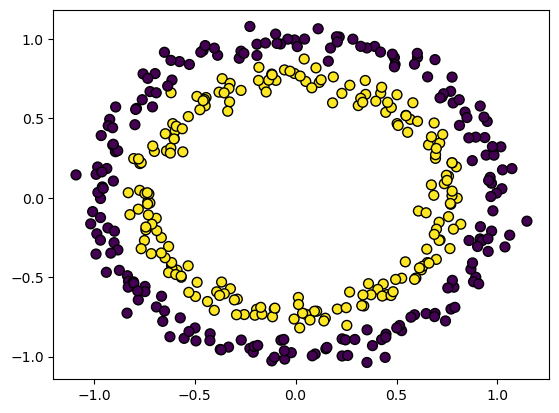

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X, y = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.show()